## We have the min and max temperatures in a city In India for each months of the year.We would like to find a function to describe this and show it graphically,

Text(0, 0.5, 'Min and max temperature')

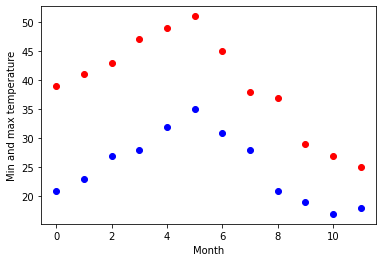

In [1]:
import numpy as np

temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, temp_max, 'ro')
plt.plot(months, temp_min, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [7]:
# fitting it to a periodic function

from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max)
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min)

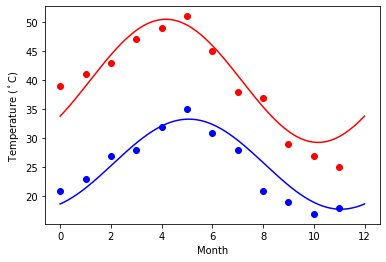

In [8]:
# plot the fit

days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

## Charts to plot:
## 1. Create a pie chart presenting the male/female proportion
## 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)

In [10]:
titanic.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [19]:
series1 = np.round(titanic['sex'].value_counts()*100/len(titanic),2)
df = pd.DataFrame(series1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000288355742E0>],
      dtype=object)

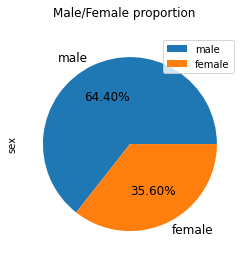

In [27]:
df.plot(subplots=True,kind='pie',fontsize = 12, autopct = '%.2f%%',title="Male/Female proportion")

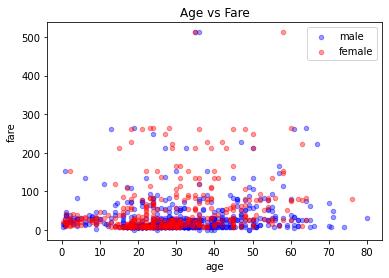

In [49]:
ax = titanic[titanic['sex'] == 'male'].plot.scatter(x='age',y='fare',c='blue',alpha=0.4,label='male')
titanic[titanic['sex'] == 'female'].plot.scatter(x='age',y='fare',c='red',label='female',ax=ax,alpha=0.4,title="Age vs Fare")